In [1]:
#installation:
#https://pylians3.readthedocs.io/_/downloads/en/master/pdf/
import numpy as np
import matplotlib.pyplot as plt
import MAS_library as MASL
import Pk_library as PKL

# Week 1: Make a power spectrum

In [95]:
## Load Halo from: https://quijote-simulations.readthedocs.io/en/latest/halos.html
# catalog file
#'/home/fvillaescusa/Quijote/Halos/fiducial/0/out_4_pid.list'
f_catalog = '/scratch/network/vk9342/hlist_1.00000.list'

# read the halo catalog
data = np.loadtxt(f_catalog)

# we can now get the different properties of the halos
Mvir = data[:,10]
sam_Mvir = data[:,9]
# Vmax = data[:,3]
# PID  = data[:,41]
x = data[:,17]
y = data[:,18]
z = data[:,19]

print(max(x))
print(min(x))

999.99792
0.00989


In [96]:
## Compute density field delta
# https://pylians3.readthedocs.io/en/master/construction.html

# number of particles
Np = 128**3

# density field parameters
grid    = 128*4    #the 3D field will have grid x grid x grid voxels
BoxSize = 1000.0 #Mpc/h ; size of box
MAS     = 'TSC'  #mass-assigment scheme   
verbose = False   #print information on progress

## particle positions in 3D
#pos = np.random.random((Np,3)).astype(np.float32)*BoxSize 
pos = np.vstack((x, y, z)).T  
pos = pos.astype(np.float32)/BoxSize                    


# define 3D density field
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)

# at this point, delta contains the effective number of particles in each voxel
# now compute overdensity and density constrast
delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0

In [97]:
## Make power spectrum 
# compute power spectrum
axis = 0  #Axis along which compute the quadrupole, hexadecapole and the 2D power spectrum.
threads = 1  #Number of openmp threads to be used
Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose) 

# Pk is a python class containing the 1D, 2D and 3D power spectra, that can be retrieved as

# 1D P(k)
k1D      = Pk.k1D
Pk1D     = Pk.Pk1D
Nmodes1D = Pk.Nmodes1D

# 2D P(k)
kpar     = Pk.kpar
kper     = Pk.kper
Pk2D     = Pk.Pk2D
Nmodes2D = Pk.Nmodes2D

# 3D P(k)  #WHAT IS THE DIFFERENCE BETWEEN EACH ONE
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D


Text(0, 0.5, 'Pk [(Mpc/h)^3]')

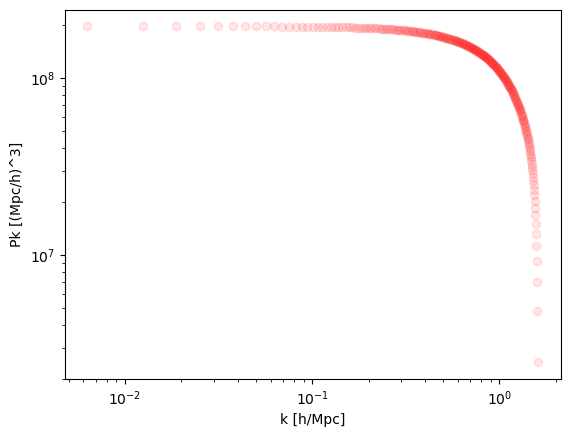

In [99]:
## Plot power spectrum

plt.loglog(k1D, Pk1D, 'ro', alpha = 0.1)
plt.xlabel('k [h/Mpc]')
plt.ylabel('Pk [(Mpc/h)^3]')

In [100]:
print('Pk shape:', Pk.Pk.shape)
print('Halo mass', Mvir)
print ('delta:', delta)

Pk shape: (443, 3)
Halo mass [4.419e+15 3.258e+15 2.958e+15 ... 7.222e+12 6.566e+12 3.283e+12]
delta: [[[ 3.90901600e+07  1.76131720e+07  3.32000580e+01 ... -1.00000000e+00
   -1.00000000e+00  2.38160925e+06]
  [ 1.72648320e+07  7.79310600e+06  1.49526014e+01 ... -1.00000000e+00
   -1.00000000e+00  1.05084975e+06]
  [ 3.19807053e+01  1.43570518e+01 -9.99963343e-01 ... -1.00000000e+00
   -1.00000000e+00  8.86980891e-01]
  ...
  [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [ 2.43135600e+06  1.09598238e+06  9.36568022e-01 ... -1.00000000e+00
   -1.00000000e+00  1.47281625e+05]]

 [[ 1.75582480e+07  7.90228350e+06  1.39291258e+01 ... -1.00000000e+00
   -1.00000000e+00  1.07338850e+06]
  [ 7.74778250e+06  3.49563100e+06  5.94198895e+00 ... -1.00000000e+00
   -1.00000000e+00  4.73456969e+05]
  [ 1.49990425e+01  6.35280561e+00

# Power spectra from Quijote

In [6]:
## https://quijote-simulations.readthedocs.io/en/latest/Pk.html

###       Linear power spectra #######

# f_Pk   = '/home/fvillaescusa/Quijote/Linear_Pk/ns_p/CAMB_TABLES/CAMB_matterpow_0.dat'
# f_norm = '/home/fvillaescusa/Quijote/Linear_Pk/ns_p/Normfac.txt'
f_Pk   = 'CAMB_matterpow_0.dat'
f_norm = 'Normfac.txt'


k, Pk   = np.loadtxt(f_Pk, unpack=True)
Normfac = np.loadtxt(f_norm)

Pk_norm = Pk*Normfac

# ###     Non-linear power spectra #######

# k, Pk = np.loadtxt('/home/fvillaescusa/Quijote/Pk/matter/fiducial/3/Pk_m_z=0.txt', unpack=True)
# k, Pk0, Pk2, Pk4 = np.loadtxt('/home/fvillaescusa/Quijote/Pk/matter/fiducial/3/Pk_m_RS1_z=0.txt', unpack=True)


# ###      Marked power spectra #######
# f = h5py.File(FILENAME, 'r')
# k = f['k'][:]
# # Fiducial cosmology
# Mk = f['i'][:]
# # Massive neutrino cosmologies
# Mk = f['cosmo/i_suffix'][:]
# # Other cosmologies
# Mk = f['cosmo/i'][:]

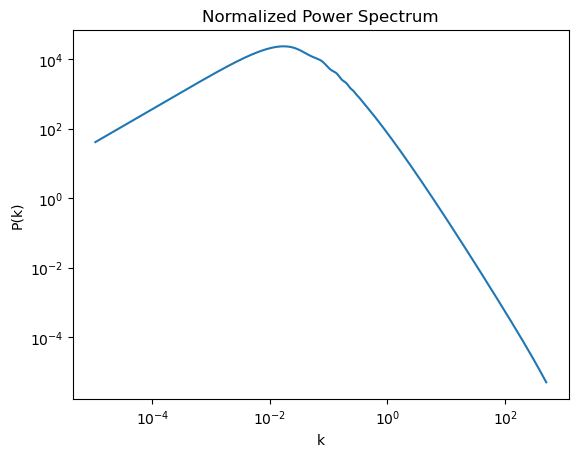

In [7]:
## Plot power spectrum
# Plot the power spectrum
plt.figure()
plt.loglog(k, Pk_norm)
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Normalized Power Spectrum')
plt.show()

- I'm assuming that the columns called x, y and z in the file you gave m are the positions?
otherwise all clear
- What exactly is MAS and what is the difference between the possible options ('NGP', 'CIC', 'TSC', 'PCS')?
- I think I understand the rest except for  MASL.MA (I see that it makes the density field, don't know how it does that though?)
- Don't know what axis and theards are?
- Don't quite understand the difference between the 3 power spectra and like what is monopole quadrupole etc?

In [ ]:
# first is just amplitufe
# dipoel e